# MNIST CNN Solution
We will neeed a few libraries for building this neural network:
* Numpy and Pandas for data handling
* Matplotlib for visualisation
* Keras for the DL functionality:
    * models for the sequential (standard) DL frame
    * layers for the standard dense and dropout layers
    * datasets for the MNIST dataset
    * utils for one-hot encoding labels

In [56]:
import pandas as pd
import numpy as np
from keras import models, layers, datasets, utils, backend
import matplotlib.pyplot as plt
%matplotlib notebook

First, let's download the MNIST dataset and see what it looks like

In [30]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

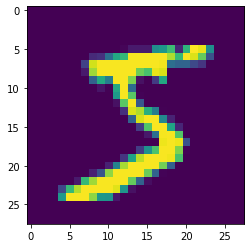

In [4]:
plt.imshow(X_train[0])

We can see that they are 28x28 pixel scans of digits.

In [31]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Data Preparation
We need our data to be in the format of Samples, Width, Height, Channels. As we need to normalise the data we will need to change to floats, and then divide by 255 (256 is the 1-index max value)

In [32]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

The y values need to be categorical. easiest to one-hot encode them

In [33]:
y_train = utils.np_utils.to_categorical(y_train)
y_test = utils.np_utils.to_categorical(y_test)

## Model
We need a model that wil convolute on each pixel, and then pool them into 2x2 views, and dropout some of the layers. We flatten them to pass them to the dense layers, and finish with the 10 softmaxed class nodes.

In [38]:
def cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [42]:
model = cnn_model()

In [43]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.2411 - acc: 0.9302 - val_loss: 0.0759 - val_acc: 0.9769
Epoch 2/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.0695 - acc: 0.9793 - val_loss: 0.0497 - val_acc: 0.9843
Epoch 3/10
60000/60000 [==============================] - 31s 520us/step - loss: 0.0504 - acc: 0.9849 - val_loss: 0.0441 - val_acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 31s 512us/step - loss: 0.0386 - acc: 0.9885 - val_loss: 0.0325 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.0323 - acc: 0.9897 - val_loss: 0.0384 - val_acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 30s 495us/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0326 - val_acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.0220 - acc: 0.9930 - val_loss: 0.

In [44]:
scores = model.evaluate(X_test, y_test, verbose=0)

<IPython.core.display.Javascript object>


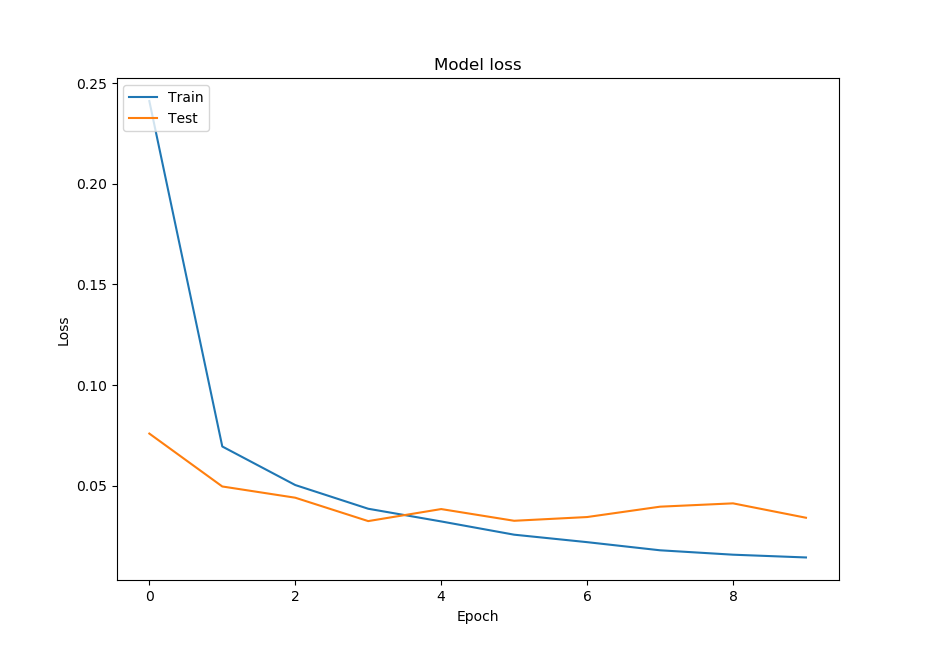

In [47]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [50]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<IPython.core.display.Javascript object>


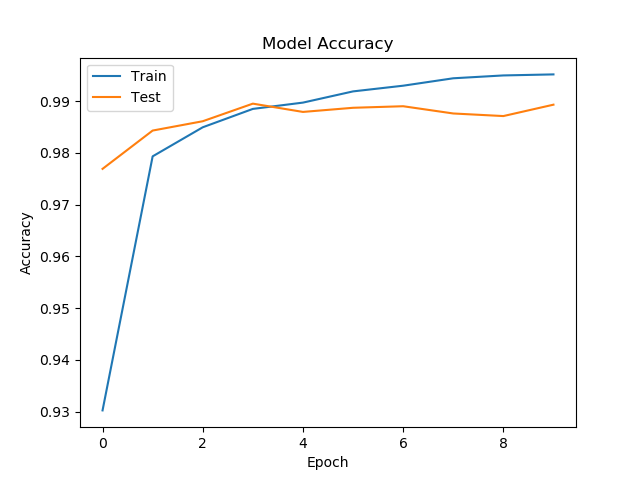

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()